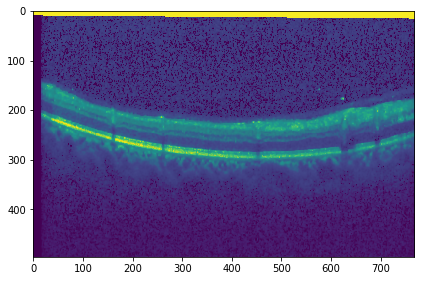

In [2]:
#ANISOTROPIC
import numpy as np
from medpy.filter.smoothing import anisotropic_diffusion
import matplotlib.pyplot as plt
import cv2
import skimage.io as io
import skimage

img_path="/home/dic/Downloads/Compressed/extract/Subject_01/images/57.png"
#img_path2="/home/dic/Desktop/seimens/Patient 387/T2Wcopy(r)/image1.png"
#noise_img_path="/home/dic/Desktop/noise.png"

img=io.imread(img_path)
#img=img.astype(np.uint8)
#img2=cv2.imread(img_path2)
#img3=cv2.imread(noise_img_path)

img_filtered1 = anisotropic_diffusion(img,5,20,0.15,option=1)
#img_filtered2= anisotropic_diffusion(img2,1,20,0.5)
#img_filtered3= anisotropic_diffusion(img3,1,20,0.5)
img_filtered1 = img_filtered1/float(255)
io.imshow(img_filtered1)
plt.show()

#plt.imshow(img_filtered2.astype(np.uint8))
#plt.show()

#plt.imshow(img_filtered3.astype(np.uint8))
#plt.show()

In [4]:
#BILATERAL

img_filtered2= cv2.bilateralFilter(img,9,75,75)
plt.imshow(img_filtered2.astype(np.uint8))
plt.show()

error: OpenCV(4.1.0) /io/opencv/modules/imgproc/src/bilateral_filter.dispatch.cpp:166: error: (-215:Assertion failed) (src.type() == CV_8UC1 || src.type() == CV_8UC3) && src.data != dst.data in function 'bilateralFilter_8u'


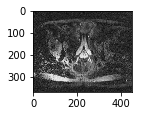

<Figure size 720x720 with 0 Axes>

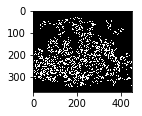

<Figure size 720x720 with 0 Axes>

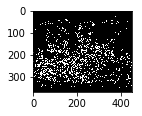

<Figure size 720x720 with 0 Axes>

In [4]:
#CANNY

def main():


#    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


    L1 = cv2.Canny(img, 50, 300, L2gradient=False)

    L2 = cv2.Canny(img, 100, 150, L2gradient=True)


    #titles = ['Original Image', 'L1 Norm', 'L2 Norm']

    outputs = [img, L1, L2]


    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.imshow(outputs[i], cmap='gray')
        plt.figure(figsize=(10,10))
        plt.show()
main()

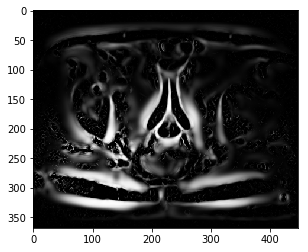

In [5]:
#FRANGI

from skimage.filters import frangi

img_filtered4 = frangi(img.mean(2))


plt.imshow(img_filtered4,cmap='gray')
plt.show()

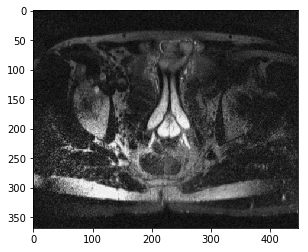

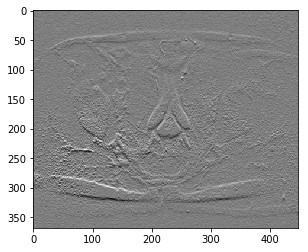

NameError: name 'skimage' is not defined

In [11]:
#GABOR FUNCTION

from skimage.filters import gabor

img_filtered_real, img_filtered_imag = gabor(img.mean(2), frequency=0.9, theta = 1.57)

plt.imshow(img_filtered_real, cmap = 'gray')
plt.show()

plt.imshow(img_filtered_imag, cmap = 'gray')
plt.show()
img_filtered_real = skimage.color.rgbtogray(img_filtered_real)
plt.imsave("/home/dic/Desktop/filter_all/gabor.png",img_filtered_real)

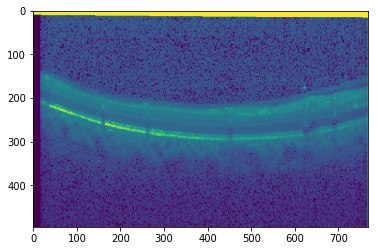

In [6]:
from skimage.filters import gaussian

img_filtered5= gaussian(img,0.75)

plt.imshow(img_filtered5.mean(2))
plt.show()

In [18]:
print(img.dtype)

uint8


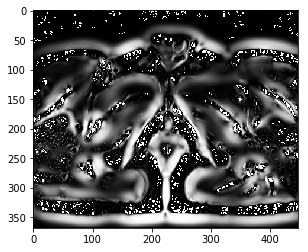

In [19]:
from skimage.filters import hessian

img_filtered6 = hessian(img.mean(2))
plt.imshow(img_filtered6,cmap='gray')
plt.show()

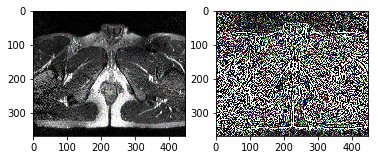

In [20]:
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

edges = cv2.Laplacian(img2,cv2.CV_8U,ksize=5)
                      #-1, ksize=5, scale=1, delta=0,borderType=cv2.BORDER_DEFAULT)
output = [img2, edges]

for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(output[i], cmap = 'gray')
plt.show()


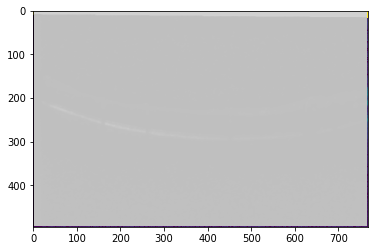

In [7]:
def meanFilter(im):
    w = 2

    for i in range(2,im.shape[0]-2):
        for j in range(2,im.shape[1]-2):
            block = im[i-w:i+w+1, j-w:j+w+1]
            m = np.mean(block)
            im[i][j] = int(m)
    return im


imgN = meanFilter(img)
plt.imshow(imgN)
plt.show()



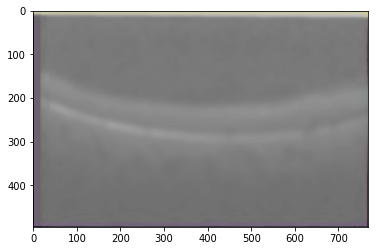

In [8]:
img_filtered7 = cv2.fastNlMeansDenoisingColored(img,None,9, 75, 75)
plt.imshow(img_filtered7)
plt.show()


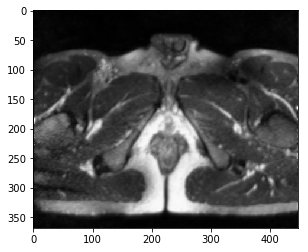

In [23]:
from scipy import ndimage
img_filtered8 = ndimage.median_filter(img, 2)
plt.imshow(img_filtered8)

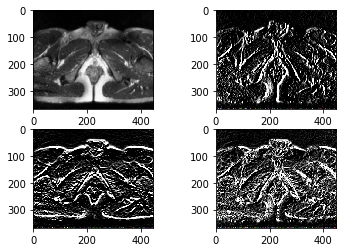

In [24]:
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
edgesx = cv2.Scharr(img1,cv2.CV_8U,1,0)

edgesy = cv2.Scharr(img1,cv2.CV_8U,0,1)
edges = edgesx + edgesy
output = [img1, edgesx, edgesy, edges]

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(output[i], cmap = 'gray')
    
plt.show()


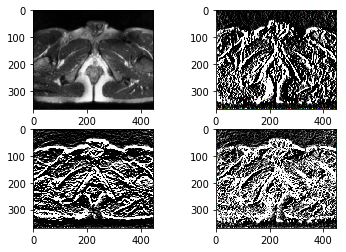

In [25]:
edgesx =  cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)

edgesy = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=5)

edges = edgesx + edgesy

output = [img, edgesx, edgesy, edges]
    
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(output[i], cmap = 'gray')
plt.show() 

/home/dic/anaconda3/lib/python3.7/site-packages/pywt/_multilevel.py:45: UserWarning: Level value of 1 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


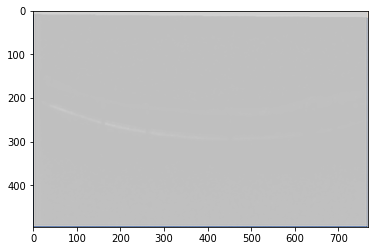

In [9]:
import skimage

img_filtered9 = skimage.restoration.denoise_wavelet(img, 0.5, wavelet='sym9')
plt.imshow(img_filtered9)
plt.show()


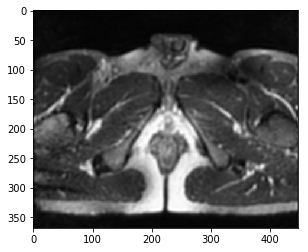

In [41]:
from skimage import color, restoration
psf = np.ones((5, 5),) / 25

#img3 = color.rgb2gray(img)
img_filtered10 = restoration.wiener(img3,psf , 1)
plt.imshow(img_filtered10,cmap='gray')
plt.show()

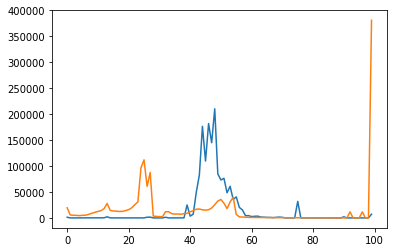

NameError: name 'img_filtered2' is not defined

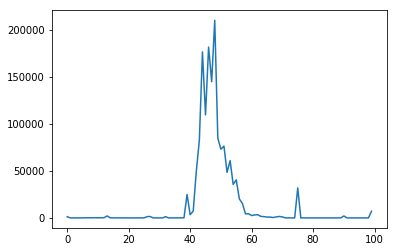

In [10]:
from pylab import *


h=np.histogram(img,100)
plt.plot(h[0])
h=np.histogram(img_filtered1,100)
plt.plot(h[0])
plt.show()


h=np.histogram(img,100)
plt.plot(h[0])
h=np.histogram(img_filtered2,100)
plt.plot(h[0])
plt.show()


h=np.histogram(img,100)
plt.plot(h[0])
h=np.histogram(img_filtered4,100)
plt.plot(h[0])
plt.show()


h=np.histogram(img,100)
plt.plot(h[0])
h=np.histogram(img_filtered5,100)
plt.plot(h[0])
plt.show()


h=np.histogram(img,100)
plt.plot(h[0])
h=np.histogram(img_filtered6,100)
plt.plot(h[0])
plt.show()

plt.subplot(437)
h=np.histogram(img,100)
plt.plot(h[0])
h=np.histogram(img_filtered7,100)
plt.plot(h[0])
plt.show()

h=np.histogram(img,100)
plt.plot(h[0])
h=np.histogram(img_filtered8,100)
plt.plot(h[0])
plt.show()

plt.subplot(439)
h=np.histogram(img,100)
plt.plot(h[0])
h=np.histogram(img_filtered9,100)
plt.plot(h[0])
plt.show()

plt.subplot(4,3,10)
h=np.histogram(img,100)
plt.plot(h[0])
h=np.histogram(img_filtered10,100)
plt.plot(h[0])
plt.show()


plt.subplot(4,3,11)
h=np.histogram(img,100)
plt.plot(h[0])
h=np.histogram(img_filtered_imag,100)
plt.plot(h[0])
h=np.histogram(img_filtered_real,100)
plt.plot(h[0])


#plt.title('bilateral', fontsize=20)
plt.show()